### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.

### Table of Contents:

* Variables
* Hypothesis
* Descriptive Statistics
* Visualizations
* Statistical Analysis & Reporting
* Optional Task


### Variables:

#### (1) What is the independent variable? What is the dependent variable?

* The independent variable in this stroop experiment is WORD-COLOR/INCONGRUENCE,whether the printed font color and word is presented to the participants matched or not matched.
     * An independent variable is a variable that is being manipulated in an experiment in order to observe the effect of dependent variable, it is also called a predictor variable
    

* The dependent variable in this stroop experiment is reaction time to the WORD-COLOR patterns, which is the response time taken in tests to state the color of the printed font
     * A dependent variable is a variable whose value depends upon independent variable.The dependent variable is sometimes called the outcome variable 

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

* I would run a paired t-test for hypothesis testing here
* I would state the reaction times for word-color match and mismatch word color are the same

### Hypothesis:

* Null Hypothesis ->  $H_{0}$ : $t_{match}$ -  $t_{mismatch}$ = 0
* Alternate Hypothesis -> $H_{1}$ : $t_{match}$ -  $t_{mismatch}$ != 0
* $t_{match}$ - mean population reaction time for Congruent set 
* $t_{mismatch}$ - mean population reaction time for Incongruent set
* Null Hypothesis states that there is no difference in the mean response times for word-color congruent and incongruent sets

* Alternate Hypothesis states that there is a difference in the mean response time to state the font color in word-color congruence set as compared to incongruent set

### Justification for paired t-test:

* The sample size is less than 30
* experiment is similar to Before and After experiment as the first set trained subjects on the study while the second set showed the Stroop Effect Incongruent set of words
* Thus, the second set is Dependent set and the reaction times in this set cannot be considered completely independent
* Hence, we use the paired t-test

## Descriptive Statistics:

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [31]:
# Import the packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read data set 
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000



Here, we need to calculate at least one measure of central tendency and at least one measure of variability. Hence, we compute the following values:

* Median for measure of central tendency
* Mean and interquartile ranges are already computed in above step.
* We also compute variance and standard deviation as measures of variability.

In [5]:
# determine mean
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [6]:
# determine variance
df.var()

Congruent      12.669029
Incongruent    23.011757
dtype: float64

In [7]:
# detremine standard deviation
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

## visualizations:

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [8]:
# Build the visualizations here
# Firs we plot histograms for values in Congruent and Incongruent sets

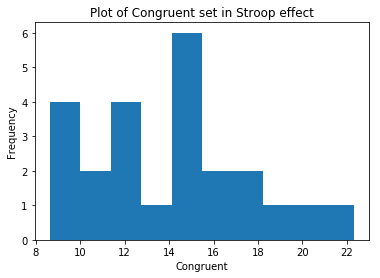

In [9]:
# Build the visualizations for Congruent set
plt.hist(df['Congruent'])
plt.xlabel('Congruent')
plt.ylabel('Frequency')
plt.title('Plot of Congruent set in Stroop effect');

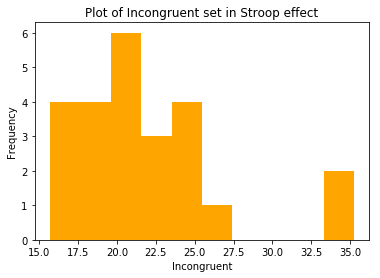

In [29]:
# Build the visualizations for Incongruent set
plt.hist(df['Incongruent'],color='orange')
plt.xlabel('Incongruent')
plt.ylabel('Frequency')
plt.title('Plot of Incongruent set in Stroop effect');

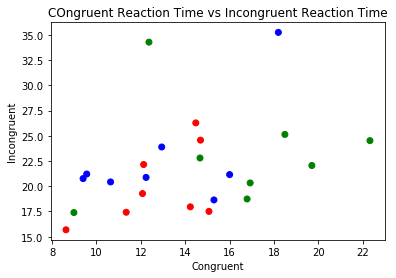

In [30]:
# plotting reacton times for congruent and incongruent sets
plt.scatter(x = df['Congruent'], y = df['Incongruent'],color='rgb');
plt.xlabel('Congruent')
plt.ylabel('Incongruent')
plt.title('COngruent Reaction Time vs Incongruent Reaction Time');

In [12]:

# We calculate correlation between the reaction times for congruent and incongruent experiments to see relation if any
df.corr()

,Congruent,Incongruent
Congruent,1.00000,0.35182
Incongruent,0.35182,1.00000



We make the following observations from the plots above:

* For word-color match, most likey reaction time is 14-15 seconds.
* For word-color mismatch, most likey reaction time is 20-21 seconds.
* Both distributions are right skewed. The incongruent set however, shows no values in the 27 and 33.5   range
* We view a roughly positive, proportional correlation with few outliers. But, as seen in the        calculated values (above), the correlation is not very strong.

## Statistical Analysis & Reporting:

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

### Performing the statistical test here

In [14]:
# Evaluate Sample Size from shape function applied to dataset
N = df.shape[0]
print("Sample Size N is {}".format(N))

Sample Size N is 24


In [15]:
# Get distribution of Congruent experiment values
a = df['Congruent']
# distribution of Incongruent experiment values
b = df['Incongruent']

In [16]:
# We have to calculate the Standard Deviation. Hence, first we compute the variance
#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1

var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

print(var_a, var_b)

12.6690290707 23.0117570362


In [17]:
## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)
print("Standard Deviation is {}".format(s))

Standard Deviation is 4.223788945182042


In [18]:
# Calculate mean for Congruent and Incongruent sets
a_mean = a.mean()
b_mean = b.mean()
print("Mean for Congruent and Incongruent response times are {} and {}".format(round(a_mean,4), round(b_mean,4)))

Mean for Congruent and Incongruent response times are 14.0511 and 22.0159


In [19]:

# Point Estimate for Null Hypothesis
mean_diff = a_mean - b_mean
print(mean_diff)

-7.96479166667


In [20]:
# calculate differences between the two response times
diff = a - b
diff

0     -7.199
1     -1.950
2    -11.650
3     -7.057
4     -8.134
5     -8.640
6     -9.880
7     -8.407
8    -11.361
9    -11.802
10    -2.196
11    -3.346
12    -2.437
13    -3.401
14   -17.055
15   -10.028
16    -6.644
17    -9.790
18    -6.081
19   -21.919
20   -10.950
21    -3.727
22    -2.348
23    -5.153
dtype: float64

In [21]:

# Mean of difference in response times
mean_diff_resp_time = round(diff.mean(),4)
mean_diff_resp_time
# Note value same as point estimate

-7.9648000000000003

In [22]:
# Calculate squared deviations from the mean
sq_dev_from_mean = (diff - mean_diff_resp_time)**2
sq_dev_from_mean

0       0.586450
1      36.177819
2      13.580699
3       0.824101
4       0.028629
5       0.455895
6       3.667991
7       0.195541
8      11.534174
9      14.724104
10     33.279053
11     21.333313
12     30.556573
13     20.828270
14     82.631736
15      4.256794
16      1.744513
17      3.331355
18      3.548702
19    194.719698
20      8.911419
21     17.958949
22     31.548442
23      7.906219
dtype: float64

In [23]:
std_dev_sq = sum(sq_dev_from_mean)/(N-1)
std_dev_sq

23.666540867826093

In [24]:
#calculate standard deviation for sample
sample_std_dev = math.sqrt(std_dev_sq)
sample_std_dev

4.864826910366503

In [25]:
# calculate t-value
t = (mean_diff_resp_time/sample_std_dev)*(math.sqrt(N))
t

-8.0207153359335646


Observations:

* We assume alpha values of 0.05
* Hence, we have 0.025 in each tail
* With N-1 degrees of freedon, ie. 23, we get positive and negative t-critical values from t-table
* These are : +2.069 and -2.069
* As our t-value value is beyond the t-critical values, we reject the Null Hypothesis
* It takes less time with color-word match than mismatch.
* Being an experimental design, we can make a causal statement that the Stroop efect holds and that word-color congruence does impact the response time.

## Optional Task

#### what is responsible for the effects observed ?

##### ANS -  When the two are matched, the process is simple. When the two are micmatched as in the second experiment, it takes focus and conscious effort to dissociate the two, process the color while suppressing the reading of te word and then naming only the color out loud.

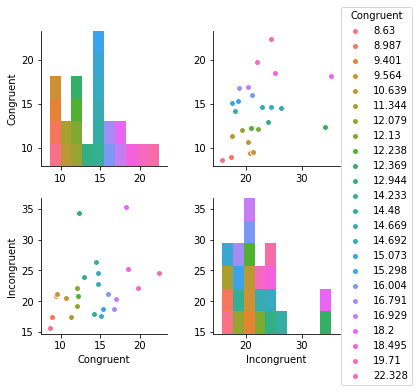

In [36]:
sns.pairplot(df,hue="Congruent")

**Can you think of an alternative or similar task that would result in a similar effect?** 

Shape-word effect. Words are printed in black in the shape particpants are asked to identify. Then, print words in black in shapes that are not matching the actual shape-word. Another task could be where paricipants are shown word-color mismatches in a language they are comfortable reading in. Then, showing the same color-word mismatch but in a language they cannot read in. This would demonstrate that when posed with only color (even if mismatched in the foreign language), subjects are able to process better as only color identification is enabled.

#### Resources:
* http://www.statisticshowto.com/probability-and-statistics/t-test/
* https://en.wikipedia.org/wiki/Stroop_effect
* https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
* http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/
* http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/


#### Notes:

* t-value and p-values are also calculated with 95% confidence interval in Excel using formula for paired t-test.
* Results and conclusions match those calculated here.